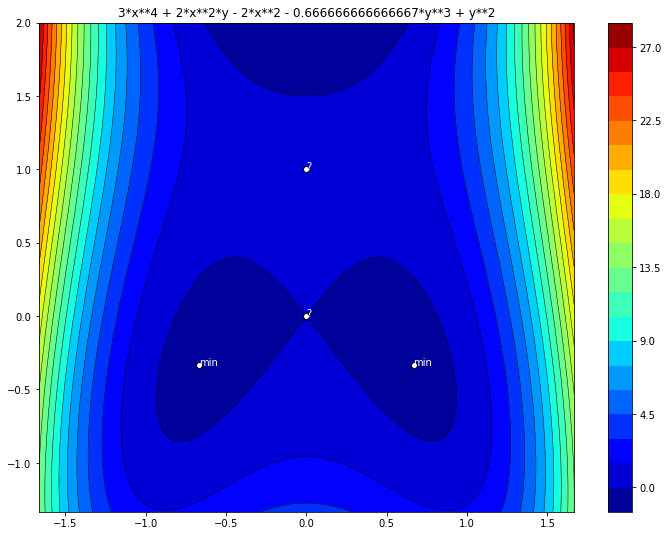

In [1]:
from matplotlib import pyplot as plt
import sympy
import numpy as np

x = sympy.symbols('x')
y = sympy.symbols('y')
funkcja = 2*x**2*y + 3*x**4 - 2*x**2 - (2/3)*y**3 + y**2
#funkcja = x**3 + 3*x*y**2 - 15*x - 12*y
#funkcja = x**2 + y**2
#funkcja = x**2 - y**2
pochodna_x=sympy.diff(funkcja,x)
pochodna_y=sympy.diff(funkcja,y)
pochodna_xx=sympy.diff(pochodna_x,x)
pochodna_yy=sympy.diff(pochodna_y,y)
pochodna_xy=sympy.diff(pochodna_x,y)

rozwiazania = sympy.solve([pochodna_x,pochodna_y],x,y)

macierz = sympy.Matrix([[pochodna_xx,pochodna_xy],[pochodna_xy,pochodna_yy]])
wyznacznik = macierz.det()

maksimum=[]
minimum=[]
brak_ekstr=[]
pkt_siodlowe=[]

if(type(rozwiazania)==dict):
    a=rozwiazania.get(x)
    b=rozwiazania.get(y)
    rozwiazania = []
    rozwiazania.append([a,b])

for i in range(len(rozwiazania)):
    det_2=wyznacznik.subs([[x,rozwiazania[i][0]],[y,rozwiazania[i][1]]])
    det_1=pochodna_xx.subs([[x,rozwiazania[i][0]],[y,rozwiazania[i][1]]]) 
    if(det_2 == 0):
        brak_ekstr.append([rozwiazania[i][0],rozwiazania[i][1]])
    if(det_2 < 0):
        pkt_siodlowe.append([rozwiazania[i][0],rozwiazania[i][1]])
    if(det_2 > 0 and det_1 < 0):
        maksimum.append([rozwiazania[i][0],rozwiazania[i][1]])
    if(det_2 > 0 and det_1 > 0):
        minimum.append([rozwiazania[i][0],rozwiazania[i][1]])
        
x_min=rozwiazania[0][0]
x_max=rozwiazania[0][0]
y_min=rozwiazania[0][1]
y_max=rozwiazania[0][1]

for i in range(len(rozwiazania)):
    if(rozwiazania[i][0] < x_min):
        x_min=rozwiazania[i][0]
    if(rozwiazania[i][0] > x_max):
        x_max = rozwiazania[i][0]
    if(rozwiazania[i][1] < y_min):
        y_min = rozwiazania[i][1]
    if(rozwiazania[i][1] > y_max):
        y_max = rozwiazania[i][1]
        
x_min-=1
x_max+=1
y_min-=1
y_max+=1

X = np.linspace(float(x_min),float(x_max),80)
Y = np.linspace(float(y_min),float(y_max),80)
Z = []
X,Y=np.meshgrid(X,Y)

for i in range(80):
    lista=[]
    for j in range(80):
        a = funkcja.subs([[x,X[i][j]],[y,Y[i][j]]])
        lista.append(a)
    Z.append(lista)

fig,ax= plt.subplots(figsize=(12,9))
CS = plt.contourf(X,Y,np.array(Z),20,cmap='jet')
ax.contour(CS, levels=CS.levels[::1], colors='k',linewidths=0.5, origin='lower')

plt.colorbar()

for i in range(len(minimum)):
    plt.annotate("min", xy=(minimum[i][0],minimum[i][1]),xytext=(minimum[i][0],minimum[i][1]),color="white")
    plt.scatter(minimum[i][0],minimum[i][1],marker='o',color="white",edgecolor="black")
    
for i in range(len(maksimum)):
    plt.annotate("max",xy=(maksimum[i][0],maksimum[i][1]),xytext=(maksimum[i][0],maksimum[i][1]),color="white")
    plt.scatter(maksimum[i][0],maksimum[i][1],marker='o',color="white",edgecolor="black")
    
for i in range(len(brak_ekstr)):
    plt.annotate("?",xy=(brak_ekstr[i][0],brak_ekstr[i][1]),xytext=(brak_ekstr[i][0],brak_ekstr[i][1]),color="white")
    plt.scatter(brak_ekstr[i][0],brak_ekstr[i][1],marker='o',color="white",edgecolor="black")
    
for i in range(len(pkt_siodlowe)):
    plt.annotate("?", xy=(pkt_siodlowe[i][0],pkt_siodlowe[i][1]),xytext=(pkt_siodlowe[i][0],pkt_siodlowe[i][1]),color="white")
    plt.scatter(pkt_siodlowe[i][0],pkt_siodlowe[i][1],marker='o',color="white",edgecolor="black")

plt.title(funkcja)

plt.savefig("09_str_277094.jpeg")